In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import adni_utils

rid_to_ptid = adni_utils.get_rid_to_ptid()
visit_num_to_code = adni_utils.get_visit_num_to_code()
dxcurren_num_to_label = adni_utils.dxcurren_num_to_label()

In [2]:
adni1_complete_3Yr_15T_feed = pd.read_csv(adni_utils.ADNI_DATA_DIR + 'ADNI1_Complete_3Yr_1.5T_6_01_2017.csv')

# DO SOME FILTERING OF VALID ROWS
# Visit has to be between 1 and 8 for this study
adni1_complete_3Yr_15T_feed = adni1_complete_3Yr_15T_feed[adni1_complete_3Yr_15T_feed['Visit'] < 9]
# Scaled_2 in Description is always a duplicate of the same subject and visit. TBD what Scaled_2 actually means
adni1_complete_3Yr_15T_feed = adni1_complete_3Yr_15T_feed[
    ['Scaled_2' not in row for row in adni1_complete_3Yr_15T_feed['Description']]
]


# Add user and visit key column
user_key = []
for subj, vis in zip(adni1_complete_3Yr_15T_feed['Subject'], adni1_complete_3Yr_15T_feed['Visit']):
    vis = visit_num_to_code[vis]
    user_key.append(subj+'_'+vis)
adni1_complete_3Yr_15T_feed['user_key'] = user_key
adni1_complete_3Yr_15T_feed

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,user_key
0,63874,941_S_1202,Patient,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN,941_S_1202_bl
1,75150,941_S_1202,Patient,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN,941_S_1202_m06
2,204843,941_S_1202,Patient,M,81,8,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/14/2010,NiFTI,NaN,941_S_1202_m36
3,137298,941_S_1202,Patient,M,80,6,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/17/2009,NiFTI,NaN,941_S_1202_m24
4,105437,941_S_1202,Patient,M,79,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2008,NiFTI,NaN,941_S_1202_m12
5,63847,941_S_1194,Patient,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,1/20/2007,NiFTI,NaN,941_S_1194_bl
6,75141,941_S_1194,Patient,M,85,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/22/2007,NiFTI,NaN,941_S_1194_m06
7,103731,941_S_1194,Patient,M,86,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/25/2008,NiFTI,NaN,941_S_1194_m12
8,204829,941_S_1194,Patient,M,88,8,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,2/13/2010,NiFTI,NaN,941_S_1194_m36
9,137271,941_S_1194,Patient,M,87,6,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/14/2009,NiFTI,NaN,941_S_1194_m24


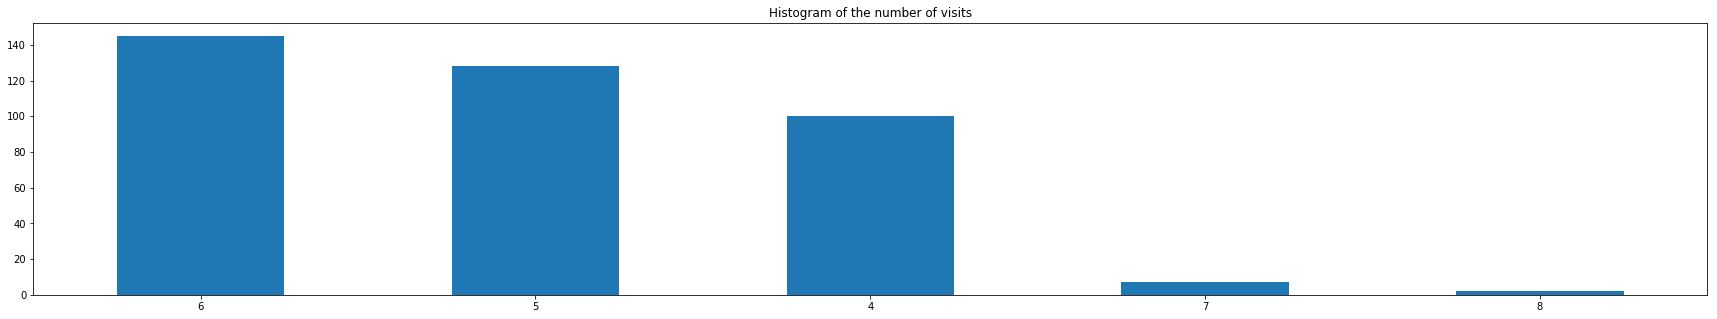

In [3]:
adni1_complete_3Yr_15T_bySubject = adni1_complete_3Yr_15T_feed.groupby(by='Subject')
adni1_complete_3Yr_15T_visits = adni1_complete_3Yr_15T_bySubject.count().max(axis=1)
adni1_complete_3Yr_15T_visits.value_counts().plot(kind='bar', 
                                                  title="Histogram of the number of visits", 
                                                  use_index=True, figsize=(30, 5))
plt.xticks(rotation=0)
plt.show()

In [4]:
diagnostics_feed = pd.read_csv(adni_utils.ADNI_DATA_DIR + 'DXSUM_PDXCONV_ADNIALL.csv')

# DO SOME FILTERING OF VALID ROWS

# Remove rows where current diagnosis is NaN
diagnostics_feed = diagnostics_feed[diagnostics_feed['DXCURREN'].notnull()]

# Add user and visit key column
user_key = []
for subj, vis in zip(diagnostics_feed['RID'], diagnostics_feed['VISCODE']):
    subj = rid_to_ptid[subj]
    user_key.append(subj+'_'+vis)
diagnostics_feed['user_key'] = user_key
diagnostics_feed

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,DXCHANGE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,update_stamp,user_key
0,ADNI1,2,2,107,bl,bl,2005-10-01,NaN,2005-09-29,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-01 00:00:00.0,011_S_0002_bl
1,ADNI1,4,3,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2005-10-01 00:00:00.0,011_S_0003_bl
2,ADNI1,6,5,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-01 00:00:00.0,011_S_0005_bl
3,ADNI1,8,8,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2005-10-01 00:00:00.0,011_S_0008_bl
4,ADNI1,10,7,10,bl,bl,2005-10-06,NaN,2005-10-06,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-06 00:00:00.0,022_S_0007_bl
5,ADNI1,12,15,4,bl,bl,2005-10-18,NaN,2005-10-18,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-18 00:00:00.0,100_S_0015_bl
6,ADNI1,14,30,11,bl,bl,2005-10-20,NaN,2005-10-20,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-20 00:00:00.0,023_S_0030_bl
7,ADNI1,16,31,11,bl,bl,2005-10-24,NaN,2005-10-24,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-24 00:00:00.0,023_S_0031_bl
8,ADNI1,18,16,107,bl,bl,2005-11-02,NaN,2005-10-25,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2005-11-02 00:00:00.0,011_S_0016_bl
9,ADNI1,20,21,107,bl,bl,2005-11-02,NaN,2005-11-01,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-11-02 00:00:00.0,011_S_0021_bl


In [5]:
print('Number of rows, total: ', len(adni1_complete_3Yr_15T_feed))
print('Number of longitudinal records, total: ', len(adni1_complete_3Yr_15T_visits))

Number of rows, total:  1975
Number of longitudinal records, total:  382


## Merge diagnostic feed and the imaging data feed

In [6]:
imaging_and_diagnostics = pd.merge(adni1_complete_3Yr_15T_feed, diagnostics_feed, on='user_key')
imaging_and_diagnostics.columns

Index(['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality',
       'Description', 'Type', 'Acq Date', 'Format', 'Downloaded', 'user_key',
       'Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'EXAMDATE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP',
       'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2',
       'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET',
       'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB',
       'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP',
       'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP',
       'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID',
       'update_stamp'],
      dtype='object')

In [93]:
imaging_and_diagnostics['DIAGNOSIS'] = imaging_and_diagnostics['DXCURREN'].apply(dxcurren_num_to_label)
imaging_and_diagnostics[imaging_and_diagnostics['VISCODE'] == 'bl'].groupby(['Subject', 'VISCODE']).agg(['mean', 'count'])


Image Data ID        Age       Visit       Downloaded  \
                            mean count mean count  mean count       mean   
Subject    VISCODE                                                         
002_S_0295 bl              45108     1   85     1     1     1        NaN   
002_S_0413 bl              45117     1   76     1     1     1        NaN   
002_S_0619 bl              48617     1   78     1     1     1        NaN   
002_S_0685 bl              40683     1   90     1     1     1        NaN   
002_S_0729 bl              40708     1   65     1     1     1        NaN   
002_S_0782 bl              40717     1   82     1     1     1        NaN   
002_S_0938 bl              40980     1   82     1     1     1        NaN   
002_S_1018 bl              40817     1   71     1     1     1        NaN   
002_S_1070 bl              40831     1   74     1     1     1        NaN   
002_S_1155 bl              40845     1   58     1     1     1        NaN   
002_S_1261 bl              62377     1   71     1     1     1        NaN   
002_S_1268 bl              64037     1   83     1     1     1        NaN   
002_S_1280 bl              60056     1   71     1     1     1        NaN   
003_S_1122 bl              52799     1   77     1     1     1        NaN   
005_S_0221 bl              72128     1   68     1     1     1        NaN   
005_S_0223 bl              32855     1   78     1     1     1        NaN   
005_S_0324 bl              32891     1   75     1     1     1        NaN   
005_S_0546 bl              32681     1   80     1     1     1        NaN   
005_S_0553 bl              32644     1   85     1     1     1        NaN   
005_S_0602 bl              32672     1   71     1     1     1        NaN   
005_S_0610 bl              32667     1   79     1     1     1        NaN   
005_S_0814 bl              74591     1   71     1     1     1        NaN   
005_S_1224 bl              60406     1   81     1     1     1        NaN   
005_S_1341 bl              60417     1   72     1     1     1        NaN   
006_S_0547 bl              75279     1   76     1     1     1        NaN   
006_S_1130 bl              55972     1   71     1     1     1        NaN   
007_S_0041 bl              35734     1   71     1     1     1        NaN   
007_S_0068 bl              35790     1   75     1     1     1        NaN   
007_S_0101 bl              36726     1   74     1     1     1        NaN   
007_S_0128 bl              36640     1   64     1     1     1        NaN   
...                          ...   ...  ...   ...   ...   ...        ...   
133_S_1170 bl              89957     1   73     1     1     1        NaN   
136_S_0086 bl              66413     1   80     1     1     1        NaN   
136_S_0107 bl              40445     1   61     1     1     1        NaN   
136_S_0184 bl              40179     1   78     1     1     1        NaN   
136_S_0186 bl              40201     1   81     1     1     1        NaN   
136_S_0196 bl              40260     1   78     1     1     1        NaN   
136_S_0299 bl              40312     1   89     1     1     1        NaN   
136_S_0300 bl              40328     1   56     1     1     1        NaN   
136_S_0426 bl              40356     1   80     1     1     1        NaN   
136_S_0429 bl              40387     1   63     1     1     1        NaN   
137_S_0158 bl              45872     1   81     1     1     1        NaN   
137_S_0283 bl              66428     1   78     1     1     1        NaN   
137_S_0301 bl              45881     1   74     1     1     1        NaN   
137_S_0366 bl              46608     1   57     1     1     1        NaN   
137_S_0443 bl              46622     1   63     1     1     1        NaN   
137_S_0459 bl              46629     1   73     1     1     1        NaN   
137_S_0481 bl              46647     1   85     1     1     1        NaN   
137_S_0631 bl              46655     1   77     1     1     1        NaN   
137_S_0668 bl              43001     1   74     1     1     1      

In [152]:
subjects_mci = set(imaging_and_diagnostics['Subject'][(imaging_and_diagnostics['VISCODE'] == 'bl') 
                        & (imaging_and_diagnostics['DIAGNOSIS'] == 'MCI')])
print('Number of subjects with baseline MCI: ', len(subjects_mci))

Number of subjects with baseline MCI:  149


In [151]:
def is_reverted(x):
    return (sum(x > 0) != 0)

subjects_by_dxrev = (imaging_and_diagnostics.groupby('Subject')['DXREV'].agg(is_reverted) == True).reset_index()
subjects_no_rev = set(subjects_by_dxrev[subjects_by_dxrev['DXREV'] == False]['Subject'])
print('Number of subjects with no reversion to normal or AD to MCI: ', len(subjects_no_rev))

Number of subjects with no reversion to normal or AD to MCI:  369


In [153]:
valid_subjects = subjects_mci.intersection(subjects_no_rev)
print('Number of valid subjects: ', len(valid_subjects))

Number of valid subjects:  137


In [154]:
imaging_and_diagnostics_bl_mci = imaging_and_diagnostics[imaging_and_diagnostics['Subject'].isin(valid_subjects)]
imaging_and_diagnostics_bl_mci.set_index(['Subject', 'VISCODE'], inplace=True)
imaging_and_diagnostics_bl_mci = imaging_and_diagnostics_bl_mci.sortlevel()
imaging_and_diagnostics_bl_mci

Image Data ID    Group Sex  Age  Visit Modality  \
Subject    VISCODE                                                    
002_S_0729 bl               40708  Patient   F   65      1      MRI   
           m06              64741  Patient   F   66      3      MRI   
           m12              78654  Patient   F   66      4      MRI   
           m18             121067  Patient   F   67      5      MRI   
           m24             123994  Patient   F   67      6      MRI   
           m36             171092  Patient   F   68      8      MRI   
002_S_0782 bl               40717  Patient   M   82      1      MRI   
           m06              60456  Patient   M   82      3      MRI   
           m12              87283  Patient   M   83      4      MRI   
           m18             112184  Patient   M   84      5      MRI   
           m24             124718  Patient   M   84      6      MRI   
           m36             162978  Patient   M   85      8      MRI   
002_S_1070 bl               40831  Patient   M   74      1      MRI   
           m06              60478  Patient   M   74      3      MRI   
           m12              86304  Patient   M   75      4      MRI   
           m18             121072  Patient   M   75      5      MRI   
           m24             132206  Patient   M   76      6      MRI   
           m36             165275  Patient   M   77      8      MRI   
002_S_1155 bl               40845  Patient   M   58      1      MRI   
           m06              64755  Patient   M   59      3      MRI   
           m12              91395  Patient   M   59      4      MRI   
           m18             121003  Patient   M   60      5      MRI   
           m24             140722  Patient   M   60      6      MRI   
           m36             299371  Patient   M   61      8      MRI   
           m36             299374  Patient   M   61      8      MRI   
           m36             171812  Patient   M   61      8      MRI   
002_S_1268 bl               64037  Patient   M   83      1      MRI   
           m06              78668  Patient   M   83      3      MRI   
           m12             109403  Patient   M   84      4      MRI   
           m18             121012  Patient   M   84      5      MRI   
...                           ...      ...  ..  ...    ...      ...   
137_S_0481 m36             160587  Patient   M   88      8      MRI   
137_S_0631 bl               46655  Patient   M   77      1      MRI   
           m06              66220  Patient   M   78      3      MRI   
           m12              66230  Patient   M   78      4      MRI   
           m18              88478  Patient   M   79      5      MRI   
           m24             123536  Patient   M   79      6      MRI   
           m36             160594  Patient   M   80      8      MRI   
137_S_0800 bl               43035  Patient   M   74      1      MRI   
           m06              66255  Patient   M   75      3      MRI   
           m12              79092  Patient   M   75      4      MRI   
           m18             101982  Patient   M   76      5      MRI   
           m24             123506  Patient   M   76      6      MRI   
           m36             162728  Patient   M   77      8      MRI   
137_S_0973 bl               43060  Patient   M   77      1      MRI   
           m06              83861  Patient   M   77      3      MRI   
           m12              86013  Patient   M   78      4      MRI   
           m18             109973  Patient   M   78      5      MRI   
           m24             132779  Patient   M   79      6      MRI   
           m36             163371  Patient   M   80      8      MRI   
137_S_0994 bl               45943  Patient   F   55      1      MRI   
           m06              87735  Patient   F   56      3      MRI   
           m12              91224  Patient   F   56      4      MRI   
           m18             109983  Patient   F   57      5      MRI   
           m24             130128  Patient  

In [247]:
def conv_from_MCI_to_AD(x):
    return (sum(x == 3))

def no_conversion(x):
    return (all(x == 0))

print('Conversion over monitoring periods:')
conversion_over_periods = imaging_and_diagnostics_bl_mci.groupby(level=1)['DXCONTYP'].agg(conv_from_MCI_to_AD)
print(conversion_over_periods)
print('Total converted: ', conversion_over_periods.sum())
print('Total not converted: ', imaging_and_diagnostics_bl_mci.groupby(level=0)['DXCONV'].agg(no_conversion).sum())
print('Total subjects: ', len(imaging_and_diagnostics_bl_mci.groupby(level=0)))

Conversion over monitoring periods:
VISCODE
bl      0.0
m06     9.0
m12    14.0
m18    17.0
m24    16.0
m36    19.0
Name: DXCONTYP, dtype: float64
Total converted:  75.0
Total not converted:  69.0
Total subjects:  137


In [259]:
def mode(x):
    return pd.Series.mode(x)[0]

def conversion(x):
    if sum(x == 3) > 0:
        status = 'MCIc'
    else:
        status = 'MCInc'
    return status

def gender(x):
    return {'F':sum(x=='F'), 'M':sum(x=='M')}

imaging_and_diagnostics_bl_mci_gr = imaging_and_diagnostics_bl_mci.groupby(level=0)
imaging_and_diagnostics_bl_mci_gr = imaging_and_diagnostics_bl_mci_gr.agg({'Age': 'mean', 'DXCONTYP': conversion, 'Sex': mode})
imaging_and_diagnostics_bl_mci_gr['Number'] = imaging_and_diagnostics_bl_mci_gr['DXCONTYP'] == 'MCIc'
imaging_and_diagnostics_bl_mci_gr.groupby('DXCONTYP').agg({'Sex':gender, 'Age': 'mean', 'Number': 'count'})

,Sex,Number,Age
DXCONTYP,,,
MCIc,"{'F': 26, 'M': 42}",68,75.597216
MCInc,"{'F': 16, 'M': 53}",69,76.633316


In [263]:
def conversion(x):
    if sum(x == 3) == 2:
        status = 'MCIc'
    else:
        status = 'MCInc'
    return status

imaging_and_diagnostics_bl_mci_gr = imaging_and_diagnostics_bl_mci.groupby(level=0)
imaging_and_diagnostics_bl_mci_gr['DXCONTYP'].agg(conversion)

Subject
002_S_0729    MCInc
002_S_0782    MCInc
002_S_1070    MCInc
002_S_1155    MCInc
002_S_1268    MCInc
003_S_1122    MCInc
005_S_0324    MCInc
005_S_0546    MCInc
005_S_1224    MCInc
006_S_1130    MCInc
007_S_0041    MCInc
007_S_0101     MCIc
007_S_0128    MCInc
007_S_0249    MCInc
007_S_0293    MCInc
007_S_0698    MCInc
011_S_0241    MCInc
011_S_0326    MCInc
011_S_0362    MCInc
011_S_0861    MCInc
011_S_1080    MCInc
011_S_1282    MCInc
012_S_0634    MCInc
014_S_0169    MCInc
014_S_0557    MCInc
014_S_0563    MCInc
014_S_0658    MCInc
016_S_1121    MCInc
016_S_1326     MCIc
021_S_0141    MCInc
              ...  
099_S_0291    MCInc
099_S_1034    MCInc
114_S_0378    MCInc
114_S_1106    MCInc
114_S_1118    MCInc
116_S_0361    MCInc
116_S_0649    MCInc
116_S_0752    MCInc
116_S_0834    MCInc
116_S_1271    MCInc
116_S_1315     MCIc
123_S_0108    MCInc
123_S_1300    MCInc
126_S_0708    MCInc
126_S_0865    MCInc
127_S_0394    MCInc
127_S_0925    MCInc
127_S_1032    MCInc
127_S_1140  

In [275]:
suspecious = imaging_and_diagnostics_bl_mci.reset_index()[imaging_and_diagnostics_bl_mci.reset_index()['Subject'] =='007_S_0101']
suspecious['DXCONTYP']

69   -4.0
70   -4.0
71   -4.0
72   -4.0
73    3.0
74    3.0
Name: DXCONTYP, dtype: float64

In [281]:
diagnostics_feed[diagnostics_feed['RID']==101]

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,DXCHANGE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,update_stamp,user_key
37,ADNI1,76,101,2,bl,bl,2006-01-09,NaN,2006-01-05,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2006-01-09 00:00:00.0,007_S_0101_bl
341,ADNI1,686,101,2,m06,m06,2006-07-11,NaN,2006-07-06,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2006-07-11 00:00:00.0,007_S_0101_m06
961,ADNI1,1926,101,2,m12,m12,2007-01-31,NaN,2007-01-29,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,2.0,2007-01-31 00:00:00.0,007_S_0101_m12
1700,ADNI1,3406,101,2,m18,m18,2007-08-01,NaN,2007-07-31,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,2.0,2007-08-01 00:00:00.0,007_S_0101_m18
2260,ADNI1,4528,101,2,m24,m24,2008-01-22,NaN,2008-01-08,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2008-01-22 00:00:00.0,007_S_0101_m24
3091,ADNI1,6190,101,2,m36,m36,2009-01-13,NaN,2009-01-08,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2009-01-13 00:00:00.0,007_S_0101_m36
3599,ADNI1,7206,101,2,m48,m48,2010-02-04,NaN,2010-02-04,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2010-02-04 00:00:00.0,007_S_0101_m48
